In [1]:
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 18})
import os

In [2]:
# Import the function definitions that accompany this notebook tutorial.
nb_funcdef_file = "function_defs.py"
if os.path.isfile(nb_funcdef_file):
    from function_defs import make_lightcurve, listdir_contains
else:
    raise IOError("Could not find function definition file '" + nb_funcdef_file + "' that goes with this notebook.")

In [3]:
# Restore the output directory.  Note: this assumes you've run the "generate_products" notebook already.  If not you
# will need to specify the location of the products made from the "generate_products" notebook.
%store -r data_directory
# If you have not run the "generate_products" notebook during this session, uncomment the line below and specify
# the location of the output products.
#data_directory = "./raw_files/"

In [4]:
# Restore the skypos parameter.  Note: this assumes you've run the "generate_products" notebook already.  If not you
# will need to specify the sky position to use.
%store -r skypos
# If you have not run the "generate_products" notebook during this session, uncomment the line below and specify
# the sky position in degrees.
#skypos = (24.76279, -17.94948)

In [5]:
# Locate the photon files.
photon_files = {'NUV':listdir_contains(data_directory,'nd.csv'),
                'FUV':listdir_contains(data_directory,'fd.csv')}

In [6]:
photon_files['NUV'][4]

'./raw_files/e13656-nd.csv'

In [7]:
# Since this flare has such a large count rate, we can make a 5-second light curve to explore it's shape in detail.
# Flare #8 is in Visit #5 (index 4 in our array of .csv files.)
lc_nuv = make_lightcurve(photon_files['NUV'][4], 'NUV', stepsz=5., skypos=skypos, quiet=True, makefile=False)
lc_fuv = make_lightcurve(photon_files['FUV'][4], 'FUV', stepsz=5., skypos=skypos, fixed_t0=lc_nuv['t0'].min(),
                             quiet=True, makefile=False)

/Users/fleming/Work/GALEX/gPhoton/SCIENCE/FLARE_STARS/UV_CETI/gfcat/src/uvceti/gPhoton/MCUtils.py:349: RuntimeWarning: invalid value encountered in arcsin
  r = 2*np.arcsin(np.sqrt(a))
/Users/fleming/Work/GALEX/gPhoton/SCIENCE/FLARE_STARS/UV_CETI/gfcat/src/uvceti/function_defs.py:224: RuntimeWarning: invalid value encountered in less_equal
  ix = np.where((angsep <= aper) & (np.isfinite(angsep)) &
/Users/fleming/Work/GALEX/gPhoton/SCIENCE/FLARE_STARS/UV_CETI/gfcat/src/uvceti/function_defs.py:236: RuntimeWarning: invalid value encountered in less_equal
  ix = np.where((angsep <= aper) & (np.isfinite(angsep)) &
/Users/fleming/Work/GALEX/gPhoton/SCIENCE/FLARE_STARS/UV_CETI/gfcat/src/uvceti/gPhoton/MCUtils.py:349: RuntimeWarning: invalid value encountered in arcsin
  r = 2*np.arcsin(np.sqrt(a))
/Users/fleming/Work/GALEX/gPhoton/SCIENCE/FLARE_STARS/UV_CETI/gfcat/src/uvceti/function_defs.py:224: RuntimeWarning: invalid value encountered in less_equal
  ix = np.where((angsep <= aper) & (np.is

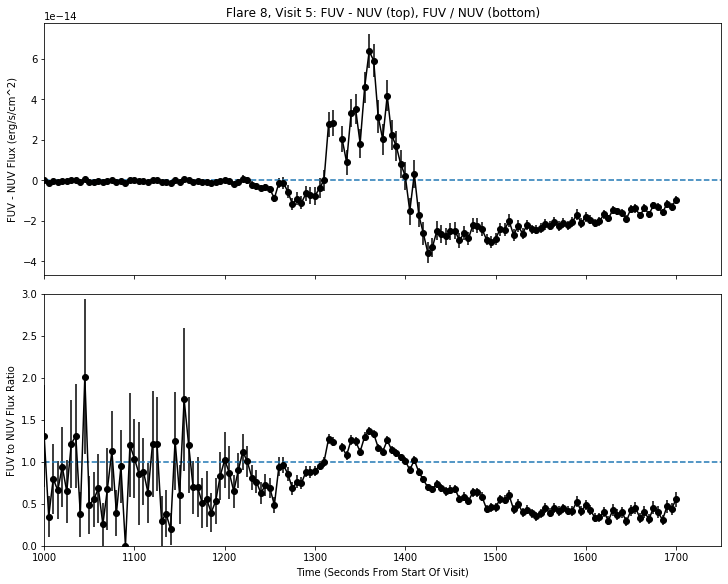

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), constrained_layout=True, sharex=True)
# FUV - NUV flux difference and propagated uncertainties: delta_z = SQRT(delta_x**2 + delta_y**2)
diff = lc_fuv['flux_apcorrected'] - lc_nuv['flux_apcorrected']
diff_err = (lc_nuv['flux_err']**2. + lc_fuv['flux_err']**2.)**0.5
ax1.errorbar((lc_nuv['t0']-min(lc_nuv['t0'])), diff, yerr=diff_err, fmt='-ko')
ax1.set_xlim(1000., 1750.)
ax1.axhline(0.0, linestyle='--')
ax1.set_ylabel("FUV - NUV Flux (erg/s/cm^2)")
ax1.set_title("Flare 8, Visit 5: FUV - NUV (top), FUV / NUV (bottom)")

# FUV / NUV flux ratio and propated uncertainties: delta_z / z = SQRT((delta_x/x)**2 + (delta_y/y)**2)
ratio = lc_fuv['flux_apcorrected'] / lc_nuv['flux_apcorrected']
ratio_err = ratio * ((lc_nuv['flux_err']/lc_nuv['flux_apcorrected'])**2. +
                     (lc_fuv['flux_err']/lc_fuv['flux_apcorrected'])**2.)**0.5
ax2.errorbar((lc_nuv['t0']-min(lc_nuv['t0'])), ratio, yerr=ratio_err, fmt='-ko')
ax2.set_xlim(1000., 1750.)
ax2.set_ylim(0., 3.)
ax2.axhline(1.0, linestyle='--')
ax2.set_xlabel("Time (Seconds From Start Of Visit)")
ax2.set_ylabel("FUV to NUV Flux Ratio")
fig.savefig("figures/flare8_diff-and-ratio.eps", dpi=600)